In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.colors import ListedColormap

# # Load the PNG image using PIL
# id = "00000003"
# pred_loc_path = "submission/guatemala-volcano_"+id+"_localization_disaster_prediction.png"
# pred_dmg_path = "submission/guatemala-volcano_"+id+"_damage_disaster_prediction.png"
# label_loc_path = "test/targets/guatemala-volcano_"+id+"_pre_disaster_target.png"
# label_dmg_path = "test/targets/guatemala-volcano_"+id+"_post_disaster_target.png"

# base_path = 'turkey_earthquake'
# city = 'Osmaniye'
# img_pre_base_path = base_path + 'images/tile_images/' + city
# tile_id = '1_11'

In [2]:
def list_subdirectories(directory_path):
    subdirectories = [d for d in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, d))]
    return subdirectories

def get_post_disaster_filename(pre_filename,filename_list):
    city = pre_filename.split('_')[0]
    idx = '_'.join(pre_filename.split('_')[-3:-1])
    post_filename = ""
    result = [filename for filename in filename_list if city in filename and idx in filename and 'post_disaster' in filename]
    if len(result) > 0:
        post_filename = result[0]
    return post_filename

base_dir = 'turkey_earthquake/'
city = 'Osmaniye'
img_base_path = base_dir + 'images/tile_images/' + city+'/'
pred_base_folder = base_dir + 'predict/submission7_all/'
label_base_folder = base_dir + 'labels/copernicus_earthquake_turkey_tile_mask_02-23_V2/'+ city+'/'
city_list = list_subdirectories(pred_base_folder)

In [3]:
city = 'Osmaniye'
tile_id = '1_11'

In [4]:
img_filelist = sorted([file for file in os.listdir(img_base_path) if file[-4:]=='.tif'])
img_filelist[:5]

['Osmaniye_20221227_10300100DF069700_pre_disaster_0_0.tif',
 'Osmaniye_20221227_10300100DF069700_pre_disaster_0_1.tif',
 'Osmaniye_20221227_10300100DF069700_pre_disaster_0_10.tif',
 'Osmaniye_20221227_10300100DF069700_pre_disaster_0_11.tif',
 'Osmaniye_20221227_10300100DF069700_pre_disaster_0_12.tif']

In [5]:
pred_filelist = sorted([file for file in os.listdir(pred_base_folder) if file[-4:]=='.png'])
label_filelist = sorted([file for file in os.listdir(label_base_folder) if file[-4:]=='.png'])
pred_filelist[:5]

['test_damage_Adiyaman-0-0_prediction.png',
 'test_damage_Adiyaman-0-10_prediction.png',
 'test_damage_Adiyaman-0-11_prediction.png',
 'test_damage_Adiyaman-0-12_prediction.png',
 'test_damage_Adiyaman-0-13_prediction.png']

In [6]:
def get_img_filename(filename_list,city,tile_id,mode):
    result = []
    if mode == 'pre':
        result = [filename for filename in filename_list if city in filename and ('_'+tile_id) in filename and '_pre_' in filename]
    if mode == 'post':
        result = [filename for filename in filename_list if city in filename and ('_'+tile_id) in filename and '_post_' in filename]
    if len(result) > 0:
        output_filename = result[0]
    else:
        output_filename = []
    return output_filename

def get_mask_filename(filename_list,city,tile_id):
    result = []
    result = [filename for filename in filename_list if city in filename and ('-'+tile_id.replace('_','-')) in filename and 'damage' in filename]
    if len(result) > 0:
        output_filename = result[0]
    else:
        output_filename = []
    return output_filename

In [37]:
city = 'Osmaniye'
tile_id = '2_10'
pre_img_filename = get_img_filename(img_filelist,city,tile_id,'pre')
post_img_filename = get_img_filename(img_filelist,city,tile_id,'post')
pred_img_filename = get_mask_filename(pred_filelist,city,tile_id)
label_img_filename = get_mask_filename(label_filelist,city,tile_id)
# get path
pre_img_path = img_base_path + pre_img_filename
post_img_path = img_base_path + post_img_filename
pred_img_path = pred_base_folder + pred_img_filename
label_img_path = label_base_folder + label_img_filename

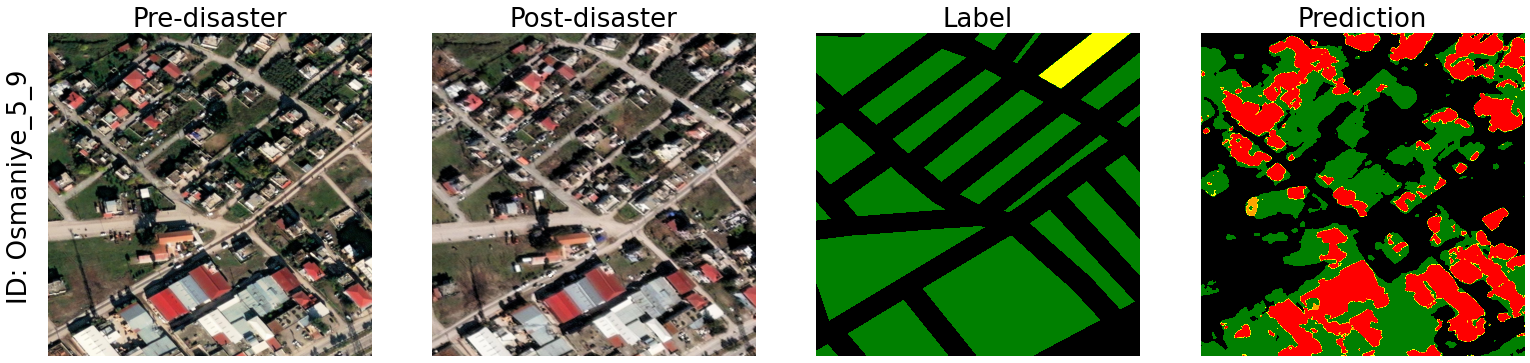

In [55]:
images_path = [pre_img_path,post_img_path,label_img_path,pred_img_path]
images = []
for image_path in images_path:
    images.append(Image.open(image_path))

fig, axes = plt.subplots(1, 4, figsize=(22, 5), sharey=True)
fontsize = 26
#### PLOT IMAGES
axes[0].imshow(images[0])
axes[0].axis('off')
axes[0].set_title("Pre-disaster", fontsize=fontsize)

axes[1].imshow(images[1])
axes[1].axis('off')
axes[1].set_title("Post-disaster", fontsize=fontsize)

#### PLOT MASKS
 # Define the custom colormap mapping values 0-4 to specified colors.
damage_colors = ['black', 'green', 'yellow', 'orange', 'red']
damage_cmap = ListedColormap(damage_colors)
axes[2].imshow(images[2], cmap=damage_cmap, vmin=0, vmax=4)
axes[2].axis('off')
axes[2].set_title("Label", fontsize=fontsize)

axes[3].imshow(images[3], cmap=damage_cmap, vmin=0, vmax=4)
axes[3].axis('off')
axes[3].set_title("Prediction", fontsize=fontsize)

# plt.ylabel("Image", fontsize=fontsize)
plt.subplots_adjust(wspace=0.3)
plt.ylabel("Image")
fig.supylabel("ID: "+city+'_'+tile_id, fontsize=fontsize)
plt.tight_layout()
plt.show()

In [42]:
def visualise_prediction(city,tile_id):
    
    pre_img_filename = get_img_filename(img_filelist,city,tile_id,'pre')
    post_img_filename = get_img_filename(img_filelist,city,tile_id,'post')
    pred_img_filename = get_mask_filename(pred_filelist,city,tile_id)
    label_img_filename = get_mask_filename(label_filelist,city,tile_id)
    # get path
    pre_img_path = img_base_path + pre_img_filename
    post_img_path = img_base_path + post_img_filename
    pred_img_path = pred_base_folder + pred_img_filename
    label_img_path = label_base_folder + label_img_filename

    images_path = [pre_img_path,post_img_path,label_img_path,pred_img_path]
    images = []
    for image_path in images_path:
        images.append(Image.open(image_path))

    fig, axes = plt.subplots(1, 4, figsize=(22, 5), sharey=True)
    fontsize = 22
    #### PLOT IMAGES
    axes[0].imshow(images[0])
    axes[0].axis('off')
    axes[0].set_title("Pre-disaster", fontsize=fontsize)

    axes[1].imshow(images[1])
    axes[1].axis('off')
    axes[1].set_title("Post-disaster", fontsize=fontsize)

    #### PLOT MASKS
     # Define the custom colormap mapping values 0-4 to specified colors.
    damage_colors = ['black', 'green', 'yellow', 'orange', 'red']
    damage_cmap = ListedColormap(damage_colors)
    axes[2].imshow(images[2], cmap=damage_cmap, vmin=0, vmax=4)
    axes[2].axis('off')
    axes[2].set_title("Label", fontsize=fontsize)

    axes[3].imshow(images[3], cmap=damage_cmap, vmin=0, vmax=4)
    axes[3].axis('off')
    axes[3].set_title("Prediction", fontsize=fontsize)

    # plt.ylabel("Image", fontsize=fontsize)
    plt.subplots_adjust(wspace=0.3)
    plt.ylabel("Image")
    fig.supylabel("ID: "+city+'_'+tile_id, fontsize=fontsize)
    plt.tight_layout()
    plt.show()

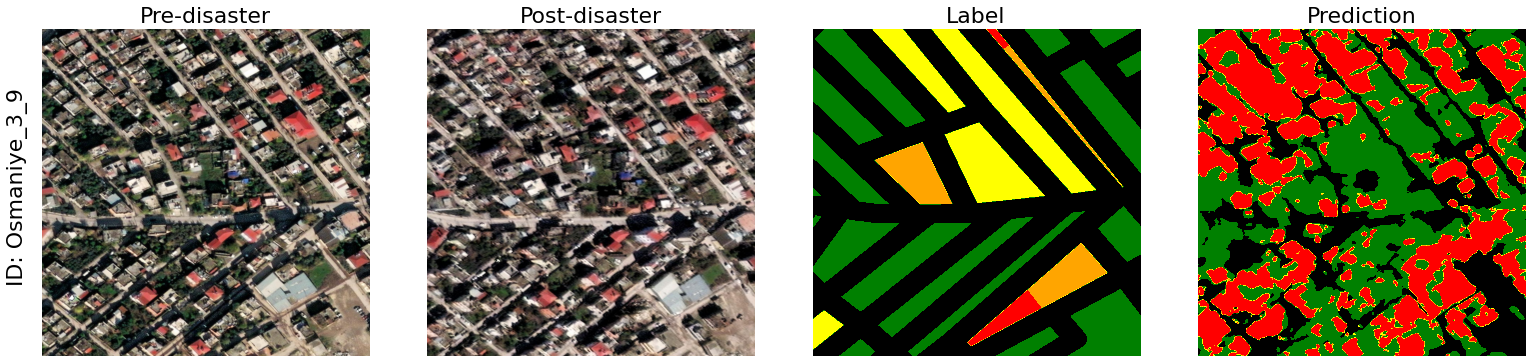

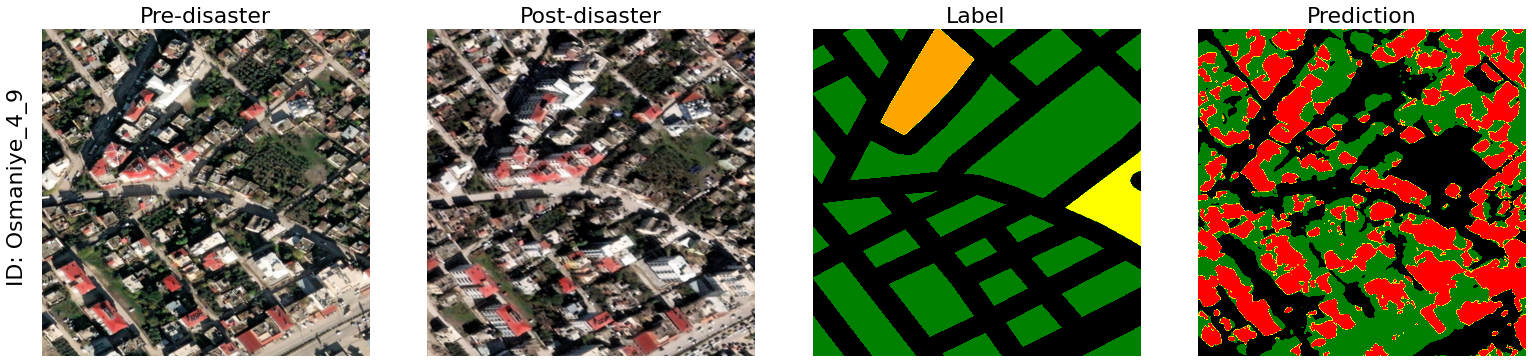

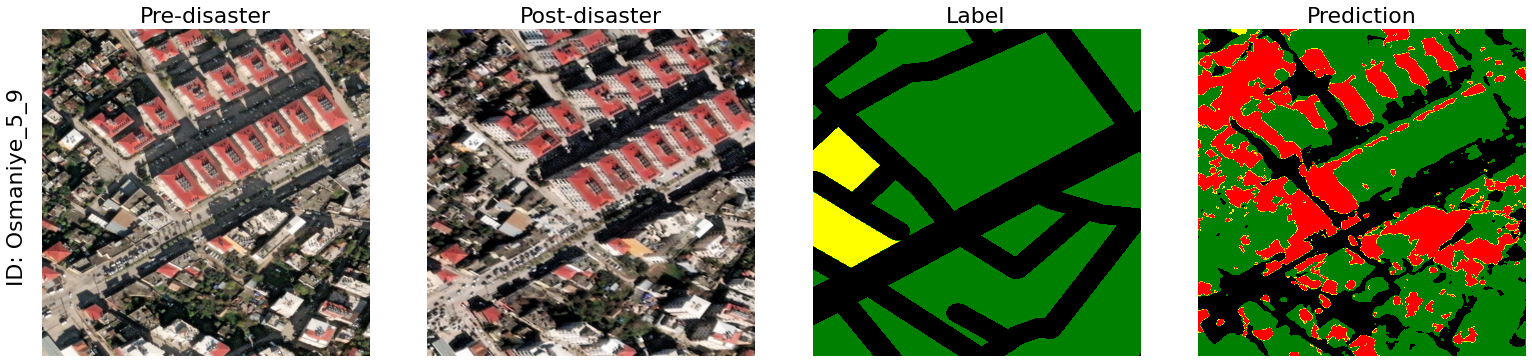

In [46]:
city = 'Osmaniye'
y_idx_start = 3
x_idx_start = 9

for i in range(3):
    x = str(x_idx_start)
    y = str(y_idx_start+i)
    tile_id = y+'_'+x
    visualise_prediction(city,tile_id) 
# visualise_prediction(city,'3_9')
# visualise_prediction(city,'3_10')
# visualise_prediction(city,'3_11')
# visualise_prediction(city,'3_12')
# savefig(base_path+'results/'+city)

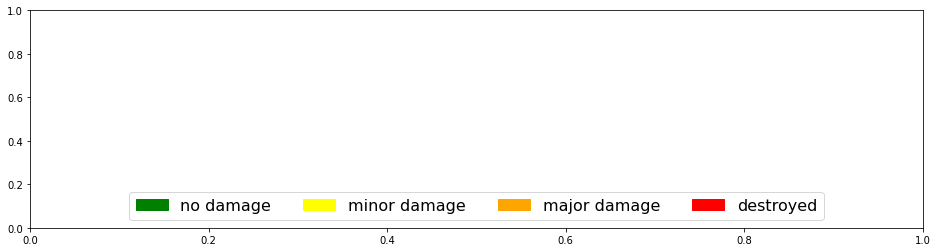

In [71]:
import matplotlib.patches as mpatches
# Create legend patches.
colormap = {1: 'green', 2: 'yellow', 3: 'orange', 4: 'red'}
labels = {1: 'no damage', 2: 'minor damage', 3: 'major damage', 4: 'destroyed'}
# labels = ['no damage', 'minor damage','major damage','destroyed']
legend_patches = [mpatches.Patch(color=color, label=labels[value]) for value, color in colormap.items()]
plt.figure(figsize=(16,4))
plt.legend(handles=legend_patches, loc='lower center', ncol=len(colormap),fontsize=16,title_fontsize = 16)
plt.show()